# Importing library and dataset

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import numpy as nm
from sklearn.datasets import load_breast_cancer
df = pd.DataFrame(load_breast_cancer()['data'],columns=load_breast_cancer()['feature_names'])
df['y'] = load_breast_cancer()['target']
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


# Spliting the dataset into Train and Test

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Checking for missing values

In [3]:
df.info()
print("\n\nThere are no missing values")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# Desicion tree model

# Building the model

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dtc=DecisionTreeClassifier()
dtc=dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
y_train_pred=dtc.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

Accuracy: 1.0


# Evaluating the model 

In [5]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9181286549707602


In [7]:
h={"criterion":["gini","entropy"],"max_depth":[10, 20, 50, 100],"min_samples_leaf":[10, 20, 50]}
dtc=GridSearchCV(DecisionTreeClassifier(),h)
dtc=dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8654970760233918


In [8]:
y_train_pred = dtc.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

Accuracy: 0.957286432160804


# Random forest

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify = y, random_state=999)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, confusion_matrix, classification_report, make_scorer
rfc=RandomForestClassifier(random_state=0, warm_start = True)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
print("confustion matrix on validation data: \n" + str(confusion_matrix(y_test, y_pred)))

0.9906542056074766
0.9814814814814815
0.9797021028037383
confustion matrix on validation data: 
[[ 62   2]
 [  1 106]]


In [14]:
positive_weight=sum(y_train == 0)/sum(y_train == 1)
rfc=RandomForestClassifier(random_state=0,class_weight={0:1,1:positive_weight},warm_start = True)
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 0.592}, random_state=0,
                       warm_start=True)

In [15]:
y_pred = rfc.predict(X_test)
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
print("\n confustion matrix on validation data: \n" + str(confusion_matrix(y_test, y_pred)))

0.9813084112149533
0.9813084112149533
0.9750292056074766

 confustion matrix on validation data: 
[[ 62   2]
 [  2 105]]


In [17]:
def scoring(ground_truth, predictions):
    cm=confusion_matrix(ground_truth, predictions)
    fp = cm[0, 1]
    fn = cm[1, 0]
    return  fn*(1/63)+fp*(2/108)

In [18]:
loss_score=make_scorer(scoring, greater_is_better = False)

In [19]:
rtc=GridSearchCV(RandomForestClassifier(random_state=0, warm_start = True),h,scoring = loss_score)
rtc.fit(X_train, y_train)
y_pred = rtc.predict(X_test)
print(recall_score(y_test, y_pred))     
print(precision_score(y_test, y_pred))  
print(roc_auc_score(y_test, y_pred))    
print("\n confustion matrix on validation data: \n" + str(confusion_matrix(y_test, y_pred)))

0.9906542056074766
0.9724770642201835
0.9718896028037383

 confustion matrix on validation data: 
[[ 61   3]
 [  1 106]]


# GBM

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify = y, random_state=999)

In [21]:
gbc=GradientBoostingClassifier(learning_rate=0.1)
gbc.fit(X_train,y_train)
print(classification_report(y_test,gbc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        64
           1       0.97      0.99      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



Confusion Matrix : 
 [[ 61   3]
 [  1 106]]
Accuracy Score is 0.9766
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97        64
           1       0.97      0.99      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

AUC-ROC: 0.9718896028037383
LOGLOSS Value is 0.8079


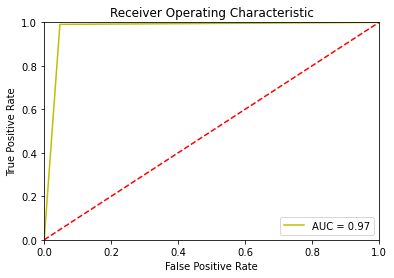

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, log_loss, roc_curve, auc
y_pred = gbc.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.4f' % (accuracy_score(y_test, y_pred)))
print ('Classification Report : \n', classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is %.4f' % log_loss(y_test, y_pred))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=3)  # k=3
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9298245614035088


In [24]:
knc=KNeighborsClassifier(n_neighbors=5)  # k=5
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9415204678362573


In [25]:
knc=KNeighborsClassifier(n_neighbors=7)  # k=7
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9473684210526315
